In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Acá tengo los datos

In [3]:
P = np.array([ 18.71,   2.79,  13.61,  12.08,   1.89])
F = np.array([4854., 2586., 3752., 3753., 2605.])
t = np.array([200., 100., 150., 150., 100.])
tc = 100.
Fc = 1021.

B = F/t - Fc/tc

A = np.ones((P.shape[0], 2))
A[:, 1] = np.log(P.T)

$B_i = \frac{F_i}{t_i} - \frac{F_c}{t_c}$

$Cov(B_i, B_j) =\frac{Cov(F_i, F_j)}{t_i t_j} \delta_{ij} + \frac{Var(F_c)}{t_c^2}$

In [4]:
V = np.eye(len(P))
np.fill_diagonal(V, F/t**2)
V += Fc/tc**2
print(V)

[[ 0.22345     0.1021      0.1021      0.1021      0.1021    ]
 [ 0.1021      0.3607      0.1021      0.1021      0.1021    ]
 [ 0.1021      0.1021      0.26885556  0.1021      0.1021    ]
 [ 0.1021      0.1021      0.1021      0.2689      0.1021    ]
 [ 0.1021      0.1021      0.1021      0.1021      0.3626    ]]


In [16]:
U = np.linalg.inv(A.T.dot(np.linalg.inv(V).dot(A)))
tita = U.dot(A.T.dot(np.linalg.inv(V)).dot(B))
X = lambda θ: (B - A.dot(θ)).T.dot(np.linalg.inv(V)).dot(B - A.dot(θ))
Xmin = X(tita)
print("β = {:.2f} +- {:.2f}".format(tita[0], np.sqrt(U[0,0])))
print("α = {:.2f} +- {:.2f}".format(tita[1], np.sqrt(U[1,1])))
print("Cov(β,α) = {:.3f}".format(U[1,1]))
print("χ2min = {}".format(Xmin))

β = 16.39 +- 0.61
α = -0.70 +- 0.22
Cov(β,α) = 0.049
χ2min = 1.192611935953655


Ahora grafico

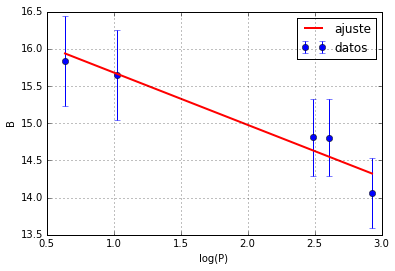

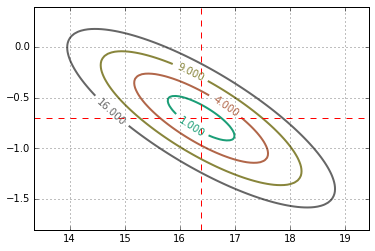

In [71]:
x = np.linspace(np.log(P).min(), np.log(P).max(), 100)
plt.figure(1)
plt.errorbar(np.log(P), B, yerr = np.sqrt(np.diag(V)), fmt = 'bo', label='datos')
plt.plot(x, tita[1]*x+tita[0], 'r-', label='ajuste', lw = 2);
plt.xlabel('log(P)')
plt.ylabel('B')
plt.grid()
plt.legend(loc=0)
α, β = (np.linspace(tita[0] - 5 * np.sqrt(U[0,0]), tita[0] + 5 * np.sqrt(U[0,0]), 100), 
                    np.linspace(tita[1] - 5 * np.sqrt(U[1,1]), tita[1] + 5 * np.sqrt(U[1,1]), 100))
X2 = []
for i in α:
    for j in β:
        X2.append(X(np.array((i,j))) - Xmin)
X2 = np.array(X2).reshape((100,100))
plt.figure(2)
plt.grid()
plt.axvline(tita[0], ls = "--", lw = 1, c = "r")
plt.axhline(tita[1], ls = "--", lw = 1, c = "r")
plt.set_cmap("Dark2")
cs = plt.contour(α, β, X2, levels = (1,4, 9, 16), linewidths = 2)
plt.clabel(cs);